In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import seaborn as sns

import geojson
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

from urllib.request import urlopen

Load World GeoJSON

In [4]:
geojson_link = "custom.geo.json"
gdf = gpd.read_file(geojson_link)
    
gdf.head()

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,None,None,None,None,None,None,None,None,NIC.geojson,"POLYGON ((-83.15752 14.99307, -83.18535 14.956..."
1,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,None,None,None,None,None,None,None,None,HTI.geojson,"MULTIPOLYGON (((-71.77925 19.71816, -71.75742 ..."
2,Admin-0 country,3,6,France,FR1,1,2,Dependency,1,Saint Martin,...,None,None,None,None,None,None,None,None,MAF.geojson,"POLYGON ((-63.01118 18.06895, -63.12305 18.068..."
3,Admin-0 country,3,6,Netherlands,NL1,1,2,Country,1,Sint Maarten,...,None,None,None,None,None,None,None,None,SXM.geojson,"POLYGON ((-63.12305 18.06895, -63.01118 18.068..."
4,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,None,None,None,None,None,None,None,None,CRI.geojson,"POLYGON ((-82.56357 9.57666, -82.56924 9.55820..."


In [9]:
input_dir = "world-happiness-report-2013-2023"
years = list(range(2015,2024))

yearly_reports = {year: pd.read_csv(os.path.join(input_dir, f"World Happiness Report {year}.csv")) for year in years}
index_report = pd.read_csv(os.path.join(input_dir, f"WorldHappinessIndex2013-2023.csv"))

yearly_reports[2021].head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [10]:
index_report.head()

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143.0
1,Singapore,2013,6.546,30.0
2,Comoros,2013,3.851,149.0
3,Sierra Leone,2013,4.318,127.0
4,Congo,2013,NaN,NaN


In [11]:
for year, df in yearly_reports.items():
    print(f"Information for {year}:")
    print(df.info())
    print()
    print("-"*30)

Information for 2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), obj

Data Cleaning

In [12]:
# 2015
yearly_reports[2015] = yearly_reports[2015].rename(columns={
    "Country": "Country name",
    "Happiness Score": "Ladder score",
    "Happiness Rank": "Rank",
    "Standard Error": "Standard error of ladder score",
    "Family": "Social support",
    "Economy (GDP per Capita)": "GDP per Capita",
    "Health (Life Expectancy)": "Healthy life expectancy",
    "Freedom": "Freedom to make life choices",
    "Trust (Government Corruption)": "Perceptions of corruption",
    "Dystopia Residual": "Dystopia + residual"
}).drop(columns=["Region"], errors='ignore')
yearly_reports[2015]["Logged GDP per capita"] = yearly_reports[2015]["GDP per Capita"].apply(np.log)
yearly_reports[2015] = yearly_reports[2015].drop(columns=["GDP per Capita"])
yearly_reports[2015]["upperwhisker"] = yearly_reports[2015]["Ladder score"] + 2 * yearly_reports[2015]["Standard error of ladder score"]
yearly_reports[2015]["lowerwhisker"] = yearly_reports[2015]["Ladder score"] - 2 * yearly_reports[2015]["Standard error of ladder score"]

# 2016
yearly_reports[2016] = yearly_reports[2016].rename(columns={
    "Country": "Country name",
    "Happiness Score": "Ladder score",
    "Happiness Rank": "Rank",
    "Standard Error": "Standard error of ladder score",
    "Lower Confidence Interval": "lowerwhisker",
    "Upper Confidence Interval": "upperwhisker",
    "Family": "Social support",
    "Economy (GDP per Capita)": "GDP per Capita",
    "Health (Life Expectancy)": "Healthy life expectancy",
    "Freedom": "Freedom to make life choices",
    "Trust (Government Corruption)": "Perceptions of corruption",
    "Dystopia Residual": "Dystopia + residual"
}).drop(columns=["Region"], errors='ignore')
yearly_reports[2016]["Logged GDP per capita"] = yearly_reports[2016]["GDP per Capita"].apply(np.log)
yearly_reports[2016] = yearly_reports[2016].drop(columns=["GDP per Capita"])

# 2017
yearly_reports[2017] = yearly_reports[2017].rename(columns={
    "Country": "Country name",
    "Happiness.Score": "Ladder score",
    "Standard Error": "Standard error of ladder score",
    "Happiness.Rank": "Rank",
    "Whisker.low": "lowerwhisker",
    "Whisker.high": "upperwhisker",
    "Family": "Social support",
    "Economy..GDP.per.Capita.": "GDP per Capita",
    "Health..Life.Expectancy.": "Healthy life expectancy",
    "Freedom": "Freedom to make life choices",
    "Trust..Government.Corruption.": "Perceptions of corruption",
    "Dystopia.Residual": "Dystopia + residual"
})
yearly_reports[2017]["Logged GDP per capita"] = yearly_reports[2017]["GDP per Capita"].apply(np.log)
yearly_reports[2017] = yearly_reports[2017].drop(columns=["GDP per Capita"])

# 2018 - standard error not given
yearly_reports[2018] = yearly_reports[2018].rename(columns={
    "Country or region": "Country name",
    "Score": "Ladder score",
    "Overall rank": "Rank",
    "Standard Error": "Standard error of ladder score",
    "GDP per capita": "GDP per Capita",
})
yearly_reports[2018]["Logged GDP per capita"] = yearly_reports[2018]["GDP per Capita"].apply(np.log)
yearly_reports[2018] = yearly_reports[2018].drop(columns=["GDP per Capita"])

# 2019 - standard error not given
yearly_reports[2019] = yearly_reports[2019].rename(columns={
    "Country or region": "Country name",
    "Score": "Ladder score",
    "Overall rank": "Rank",
    "GDP per capita": "GDP per Capita",
})
yearly_reports[2019]["Logged GDP per capita"] = yearly_reports[2019]["GDP per Capita"].apply(np.log)
yearly_reports[2019] = yearly_reports[2019].drop(columns=["GDP per Capita"], errors='ignore')

# 2020
yearly_reports[2020] = yearly_reports[2020].drop(columns=["Regional indicator"], errors='ignore')
yearly_reports[2020]['Rank'] = yearly_reports[2020]['Ladder score'].rank(method='min', ascending=False)

# 2021
yearly_reports[2021] = yearly_reports[2021].drop(columns=["Regional indicator"], errors='ignore')
yearly_reports[2021]['Rank'] = yearly_reports[2021]['Ladder score'].rank(method='min', ascending=False)

# 2022
yearly_reports[2022] = yearly_reports[2022].rename(columns={
    "Country": "Country name",
    "RANK": "Rank",
    "Happiness score": "Ladder score",
    "Whisker-high": "upperwhisker",
    "Whisker-low": "lowerwhisker",
    "Dystopia (1.83) + residual": "Dystopia + residual"
})

# 2023
yearly_reports[2023]['Rank'] = yearly_reports[2023]['Ladder score'].rank(method='min', ascending=False)

In [13]:
for year, report in yearly_reports.items():
    print(f"Columns for {year}:")
    print(list(report.columns))
    print("-"*30)

Columns for 2015:
['Country name', 'Rank', 'Ladder score', 'Standard error of ladder score', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity', 'Dystopia + residual', 'Logged GDP per capita', 'upperwhisker', 'lowerwhisker']
------------------------------
Columns for 2016:
['Country name', 'Rank', 'Ladder score', 'lowerwhisker', 'upperwhisker', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity', 'Dystopia + residual', 'Logged GDP per capita']
------------------------------
Columns for 2017:
['Country name', 'Rank', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual', 'Logged GDP per capita']
------------------------------
Columns for 2018:
['Rank', 'Country name', 'Ladder score', 'Social support', 'Healthy life expec

Inter-Data Country Name Discrepancies

In [14]:
ref_year = 2023
def print_country_discrepancies(ref_year):
    for year in years:
        yearly_report = yearly_reports[year]
        ref_yearly_report = yearly_reports[ref_year]

        diff1 = [x for x in yearly_report["Country name"].unique() if x not in ref_yearly_report["Country name"].unique()]
        diff2 = [x for x in ref_yearly_report["Country name"].unique() if x not in yearly_report["Country name"].unique()]

        print(f"Year: {year}")
        print(f"In yearly report but not in ref yearly report: {diff1}")
        print(f"In ref yearly report but not in yearly report: {diff2}")
        print("-"*30)
        
print_country_discrepancies(ref_year)

Year: 2015
In yearly report but not in ref yearly report: ['Oman', 'Qatar', 'Czech Republic', 'Taiwan', 'Kuwait', 'Suriname', 'Trinidad and Tobago', 'Belarus', 'Libya', 'North Cyprus', 'Turkmenistan', 'Hong Kong', 'Turkey', 'Bhutan', 'Azerbaijan', 'Somaliland region', 'Macedonia', 'Lesotho', 'Swaziland', 'Palestinian Territories', 'Sudan', 'Haiti', 'Djibouti', 'Yemen', 'Angola', 'Central African Republic', 'Rwanda', 'Syria', 'Burundi']
In ref yearly report but not in yearly report: ['Czechia', 'Taiwan Province of China', 'Hong Kong S.A.R. of China', 'North Macedonia', 'State of Palestine', 'Namibia', 'Turkiye', 'Gambia']
------------------------------
Year: 2016
In yearly report but not in ref yearly report: ['Puerto Rico', 'Czech Republic', 'Taiwan', 'Qatar', 'Suriname', 'Kuwait', 'Trinidad and Tobago', 'Belize', 'Belarus', 'North Cyprus', 'Turkmenistan', 'Libya', 'Hong Kong', 'Somalia', 'Turkey', 'Azerbaijan', 'Bhutan', 'Macedonia', 'Somaliland Region', 'Palestinian Territories', 'Su

In [15]:
# discrepancies is in the form {year: discrepancy}
# discrepancies[year] is in the form of {old: new}, where "old" is the name in the yearly report,
# and "new" is the name in the reference yearly report (i.e. the report from 2023)

discrepancies = {}
discrepancies[2015] = {
    "Czech Republic": "Czechia", # https://www.timeout.com/news/the-czech-republic-is-changing-its-name-heres-why-022123
    "Taiwan": "Taiwan Province of China", # https://en.wikipedia.org/wiki/Taiwan_Province,_People%27s_Republic_of_China
    "Hong Kong": "Hong Kong S.A.R. of China",
    "Macedonia": "North Macedonia", # https://en.wikipedia.org/wiki/Macedonia_naming_dispute
    "Palestinian Territories": "State of Palestine",
    "Turkey": "Turkiye", # https://theconversation.com/why-does-turkey-want-other-countries-to-start-spelling-its-name-turkiye-199390
}
discrepancies[2016] = discrepancies[2015]
discrepancies[2017] = {
    "Czech Republic": "Czechia",
    "Hong Kong S.A.R., China": "Hong Kong S.A.R. of China",
    "Macedonia": "North Macedonia", # https://en.wikipedia.org/wiki/Macedonia_naming_dispute
    "Palestinian Territories": "State of Palestine",
    "Turkey": "Turkiye", # https://theconversation.com/why-does-turkey-want-other-countries-to-start-spelling-its-name-turkiye-199390
}
discrepancies[2018] = discrepancies[2015]
discrepancies[2019] = discrepancies[2015]
discrepancies[2020] = discrepancies[2015]
discrepancies[2021] = {
    "Czech Republic": "Czechia",
    "Palestinian Territories": "State of Palestine",
    "Turkey": "Turkiye"
}
discrepancies[2022] = {
    "Luxembourg*": "Luxembourg",
    "Guatemala*": "Guatemala",
    "Palestinian Territories*": "State of Palestine",
    "Turkey": "Turkiye",
    "Niger*": "Niger",
    "Chad*": "Chad",
    "Liberia*": "Liberia",
    "Gambia*": "Gambia",
    "Comoros*": "Comoros",
    "Madagascar*": "Madagascar",
    "Botswana*": "Botswana"
}

for year, discrepancy in discrepancies.items():
    for old, new in discrepancy.items():
        yearly_reports[year].loc[yearly_reports[year]["Country name"] == old, "Country name"] = new

In [16]:
print_country_discrepancies(ref_year)

Year: 2015
In yearly report but not in ref yearly report: ['Oman', 'Qatar', 'Kuwait', 'Suriname', 'Trinidad and Tobago', 'Belarus', 'Libya', 'North Cyprus', 'Turkmenistan', 'Bhutan', 'Azerbaijan', 'Somaliland region', 'Lesotho', 'Swaziland', 'Sudan', 'Haiti', 'Djibouti', 'Yemen', 'Angola', 'Central African Republic', 'Rwanda', 'Syria', 'Burundi']
In ref yearly report but not in yearly report: ['Namibia', 'Gambia']
------------------------------
Year: 2016
In yearly report but not in ref yearly report: ['Puerto Rico', 'Qatar', 'Suriname', 'Kuwait', 'Trinidad and Tobago', 'Belize', 'Belarus', 'North Cyprus', 'Turkmenistan', 'Libya', 'Somalia', 'Azerbaijan', 'Bhutan', 'Somaliland Region', 'Sudan', 'Haiti', 'Angola', 'South Sudan', 'Yemen', 'Rwanda', 'Syria', 'Burundi']
In ref yearly report but not in yearly report: ['Mozambique', 'Gambia']
------------------------------
Year: 2017
In yearly report but not in ref yearly report: ['Qatar', 'Trinidad and Tobago', 'Kuwait', 'Belize', 'Turkmeni

Adding the Year to the Yearly Reports

In [17]:
for year, report in yearly_reports.items():
    report["Year"] = year

Combining the Yearly reports Together

In [18]:
agg_report = pd.concat(yearly_reports.values())
agg_report.sample(20)

,Country name,Rank,Ladder score,Standard error of ladder score,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia + residual,...,lowerwhisker,Year,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Explained by: GDP per capita
47,Ecuador,48.0,5.9750,0.045280,0.999030,0.790750,0.485740,0.180900,0.115410,2.539420,...,5.884440,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,France,32.0,6.4780,NaN,1.005080,0.837950,0.465620,0.178080,0.121600,2.474400,...,6.397000,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Vietnam,83.0,5.3535,0.033801,0.849987,67.952736,0.939593,0.796421,-0.094533,1.685978,...,5.287251,2020,1.972317,0.718092,1.253075,0.819134,0.650836,0.136489,0.089848,NaN
106,Iraq,107.0,4.9410,NaN,NaN,NaN,NaN,NaN,NaN,1.894000,...,4.783000,2022,NaN,NaN,0.682000,0.554000,0.328000,0.147000,0.046000,1.289
113,Cambodia,114.0,4.8300,0.067000,0.765000,62.000000,0.959000,0.843000,0.034000,2.148000,...,4.698000,2021,2.430000,0.603000,0.680000,0.426000,0.702000,0.210000,0.061000,NaN
33,Thailand,34.0,6.4550,0.035570,1.265040,0.738500,0.556640,0.031870,0.576300,2.319450,...,6.383860,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Malaysia,47.0,6.0050,NaN,0.880250,0.623660,0.390310,0.090810,0.414740,2.353840,...,5.921000,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Kosovo,66.0,5.6620,NaN,1.230000,0.578000,0.448000,0.023000,0.274000,NaN,...,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Paraguay,71.0,5.6530,0.092000,0.893000,65.900000,0.876000,0.882000,0.028000,2.306000,...,5.473000,2021,2.430000,0.983000,0.970000,0.549000,0.602000,0.206000,0.037000,NaN
119,Liberia,120.0,4.6250,0.106000,0.720000,56.498000,0.735000,0.850000,0.050000,2.857000,...,4.417000,2021,2.430000,0.228000,0.580000,0.253000,0.430000,0.221000,0.057000,NaN


In [19]:
countries = agg_report.loc[agg_report["Year"] == 2023, "Country name"]
agg_report = agg_report[agg_report["Country name"].isin(countries)]

In [20]:
agg_report.index = range(0, agg_report.shape[0])

In [21]:
agg_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                1220 non-null   object 
 1   Rank                                        1220 non-null   float64
 2   Ladder score                                1220 non-null   float64
 3   Standard error of ladder score              545 non-null    float64
 4   Social support                              1086 non-null   float64
 5   Healthy life expectancy                     1085 non-null   float64
 6   Freedom to make life choices                1086 non-null   float64
 7   Perceptions of corruption                   1085 non-null   float64
 8   Generosity                                  1086 non-null   float64
 9   Dystopia + residual                         947 non-null    float64
 10  Logged GDP p

Exploratory Data Analysis

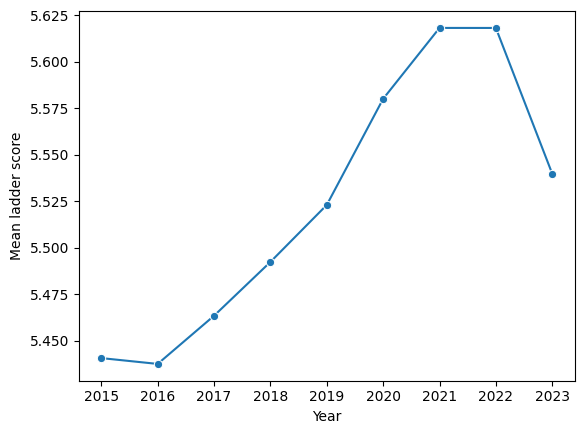

In [22]:
agg_report_grped = agg_report.groupby(by="Year").mean(numeric_only=True)
ax = sns.lineplot(data=agg_report_grped, x="Year", y="Ladder score", marker="o")
ax.set_ylabel("Mean ladder score")
plt.show()

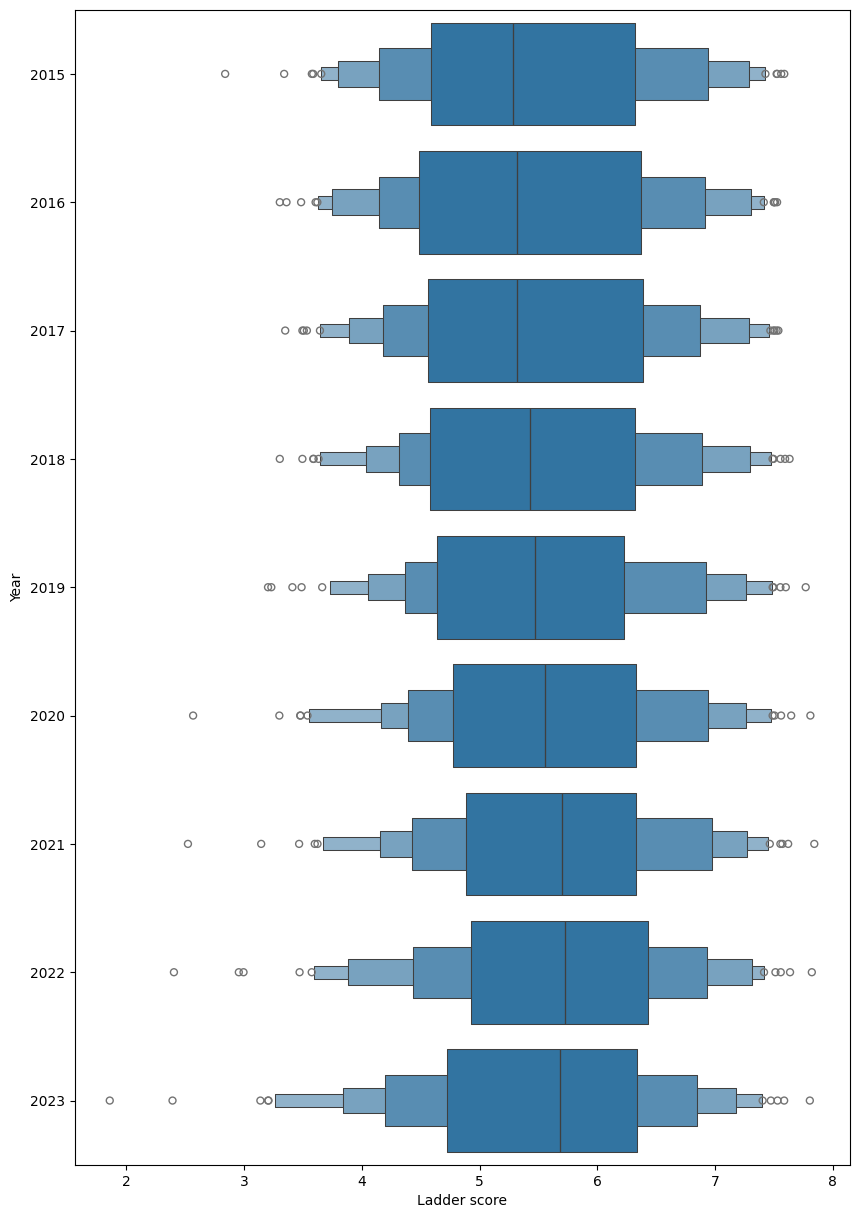

In [23]:
plt.figure(figsize=(10,15))
agg_report["CatYear"] = agg_report["Year"].astype('category')
ax = sns.boxenplot(data=agg_report, x="Ladder score", y="CatYear")
ax.set_ylabel("Year")
plt.show()

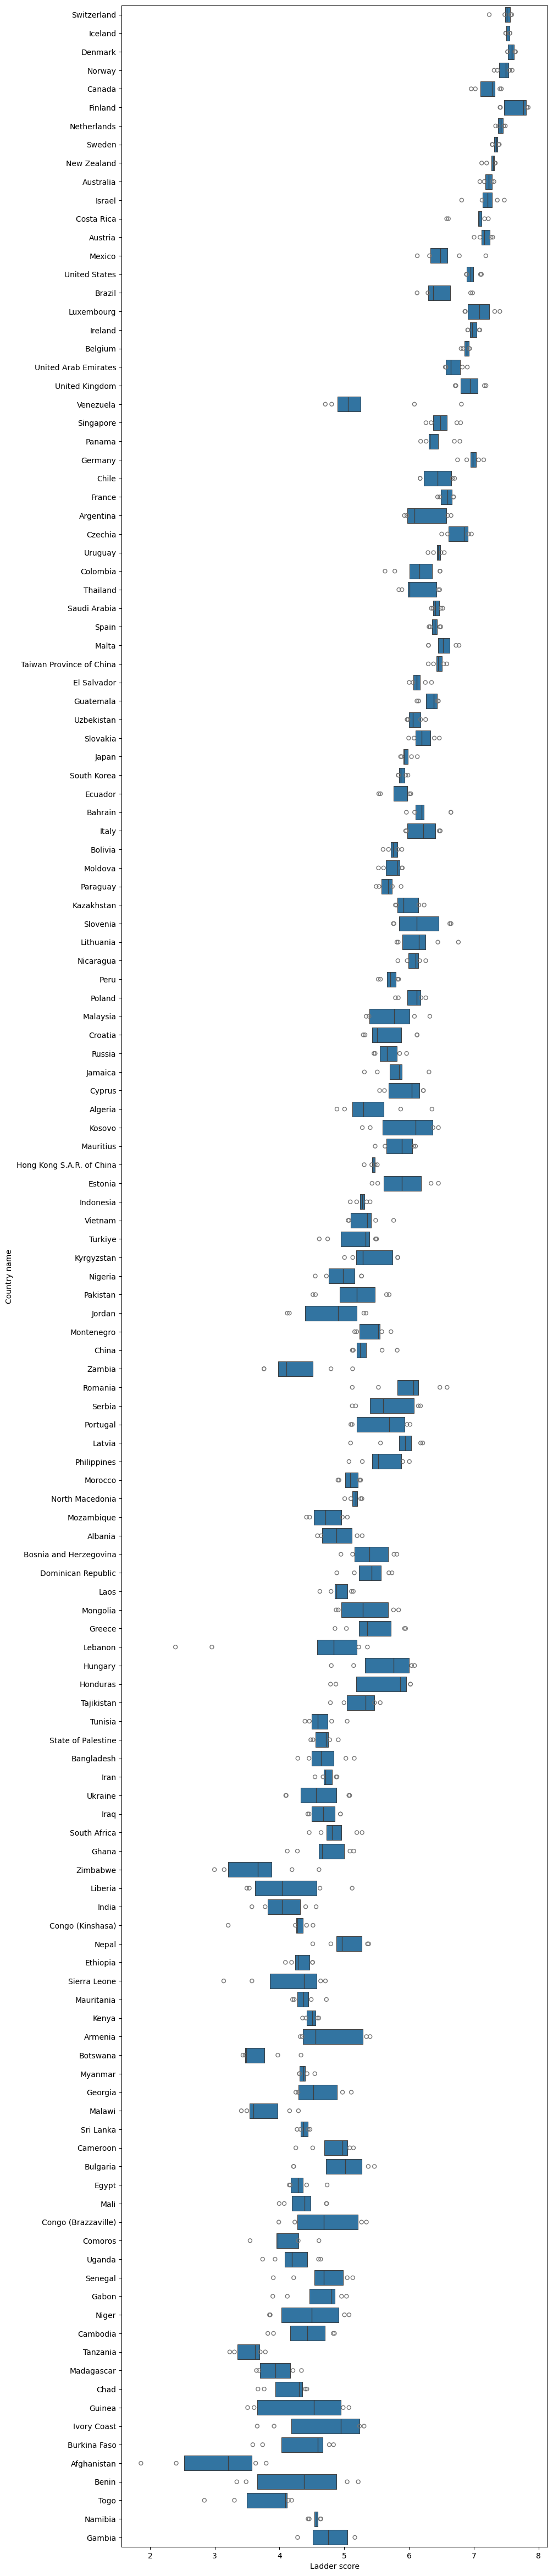

In [24]:
plt.figure(figsize=(10, 60))
ax = sns.boxenplot(data=agg_report, x="Ladder score", y="Country name")
plt.show()

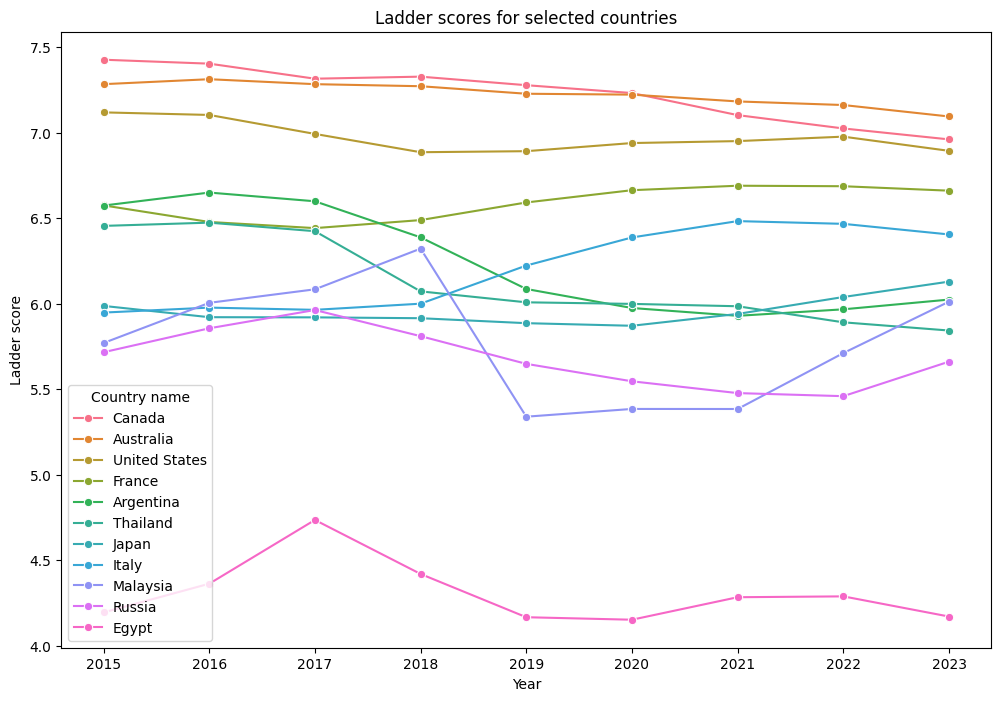

In [25]:
plt.figure(figsize=(12,8))
countries_of_interest = ["Japan", "Malaysia", "Thailand", "Australia", "United States", "Canada", "Egypt", "Argentina", "France", "Russia", "Italy"]

agg_report_filtered = agg_report[agg_report["Country name"].isin(countries_of_interest)]
ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Ladder score", hue="Country name", marker="o")
ax.set(title="Ladder scores for selected countries")
plt.show()

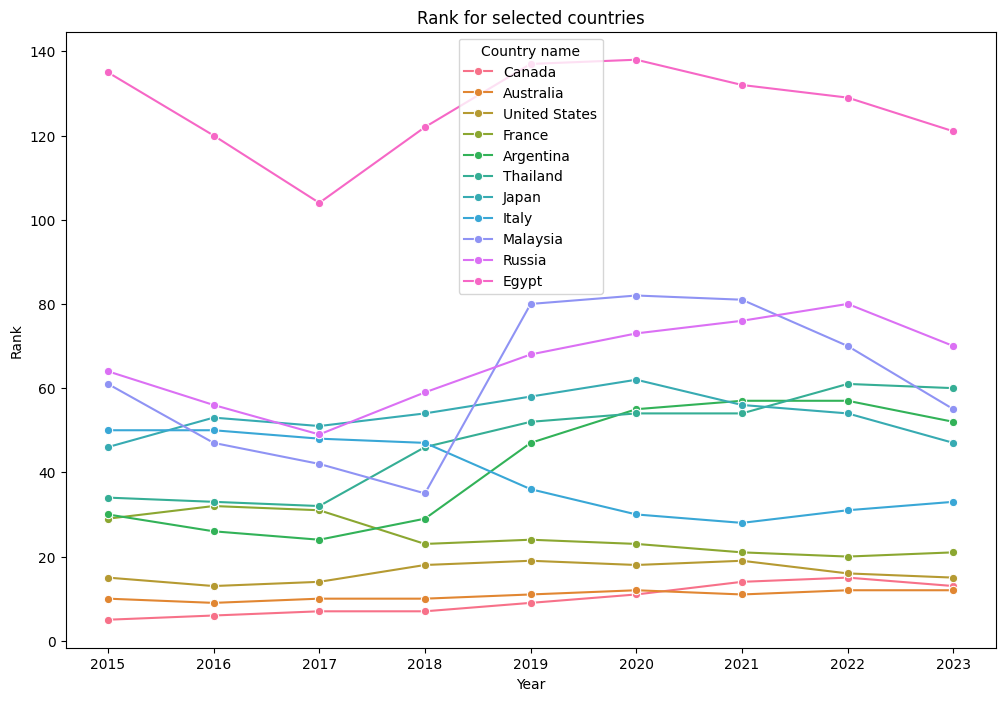

In [26]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Rank", hue="Country name", marker="o")
ax.set(title="Rank for selected countries")
plt.show()

In [27]:
happiest_countries = agg_report[agg_report["Year"] == 2023].sort_values(by="Ladder score", ascending=False).head(10)
happiest_countries[["Country name", "Ladder score"]]

,Country name,Ladder score
1083,Finland,7.804
1084,Denmark,7.586
1085,Iceland,7.530
1086,Israel,7.473
1087,Netherlands,7.403
1088,Sweden,7.395
1089,Norway,7.315
1090,Switzerland,7.240
1091,Luxembourg,7.228
1092,New Zealand,7.123


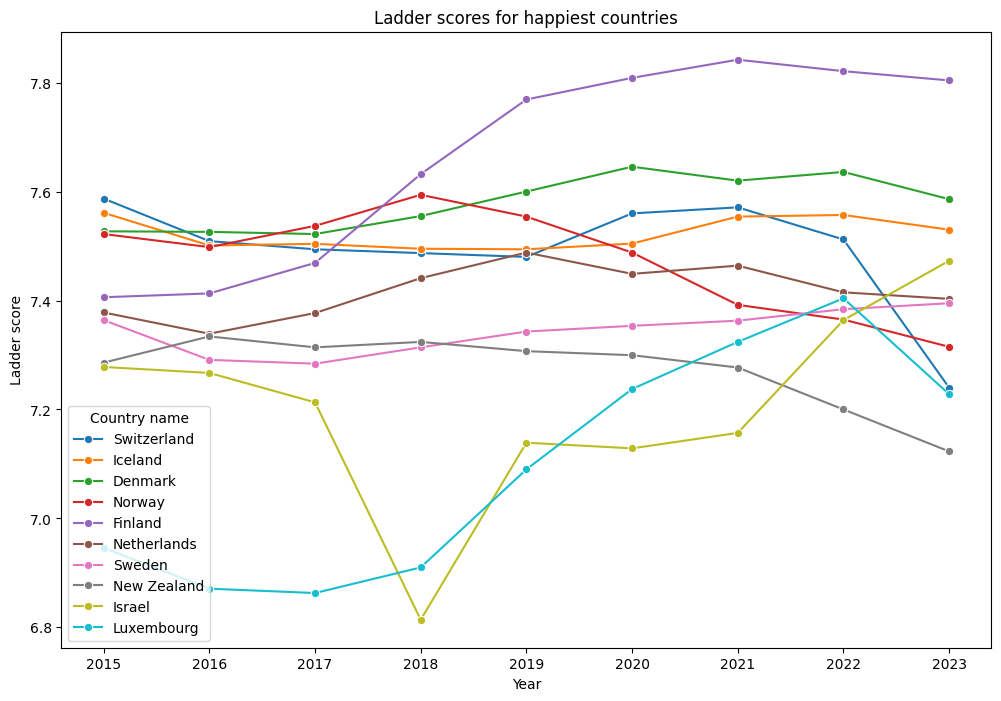

In [28]:
plt.figure(figsize=(12,8))
agg_report_filtered = agg_report[agg_report["Country name"].isin(happiest_countries["Country name"])]
ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Ladder score", hue="Country name", marker="o")
ax.set(title="Ladder scores for happiest countries")
plt.show()

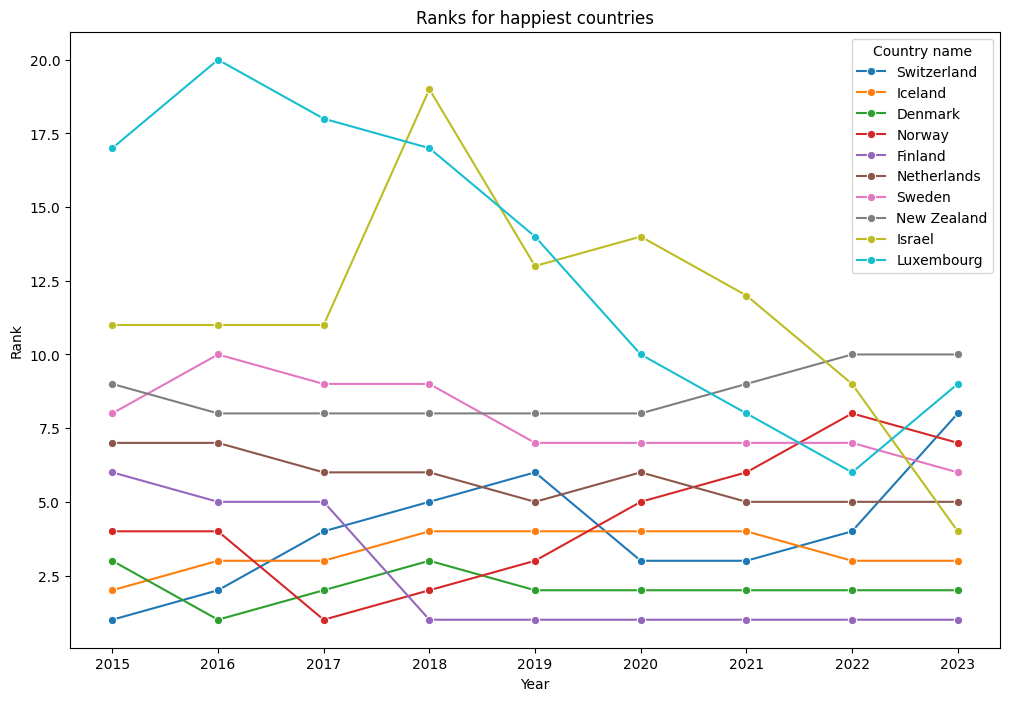

In [29]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Rank", hue="Country name", marker="o")
ax.set(title="Ranks for happiest countries")
plt.show()

In [30]:
saddest_countries = agg_report[agg_report["Year"] == 2023].sort_values(by="Ladder score", ascending=True).head(10)
saddest_countries[["Country name", "Ladder score"]]

,Country name,Ladder score
1219,Afghanistan,1.859
1218,Lebanon,2.392
1217,Sierra Leone,3.138
1216,Zimbabwe,3.204
1215,Congo (Kinshasa),3.207
1214,Botswana,3.435
1213,Malawi,3.495
1212,Comoros,3.545
1211,Tanzania,3.694
1210,Zambia,3.982


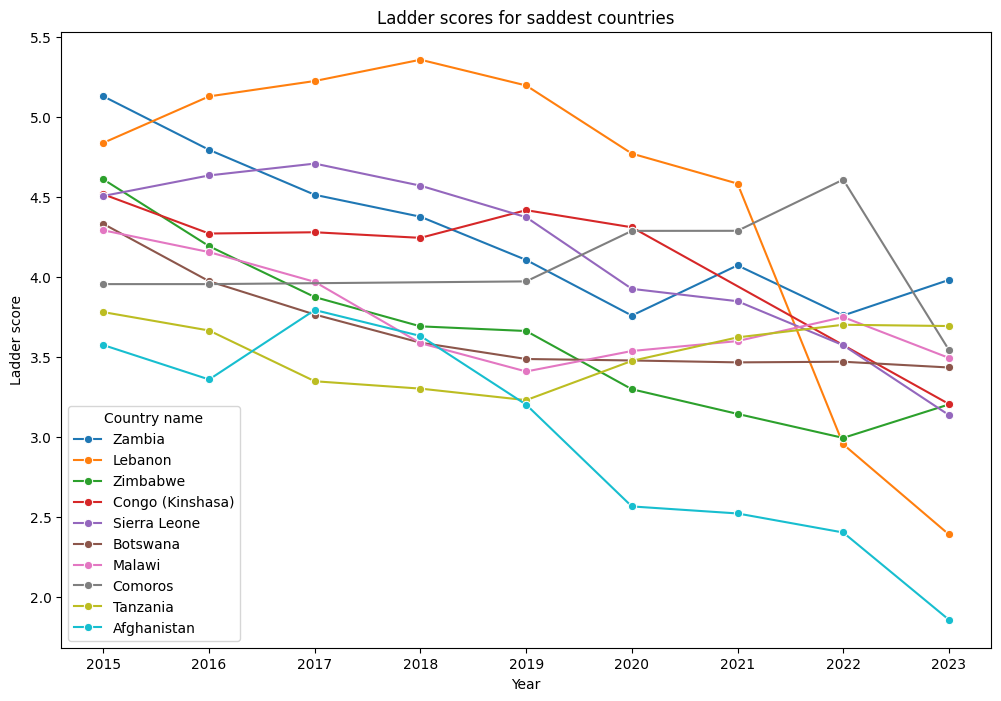

In [31]:
plt.figure(figsize=(12,8))
agg_report_filtered = agg_report[agg_report["Country name"].isin(saddest_countries["Country name"])]
ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Ladder score", hue="Country name", marker="o")
ax.set(title="Ladder scores for saddest countries")
plt.show()

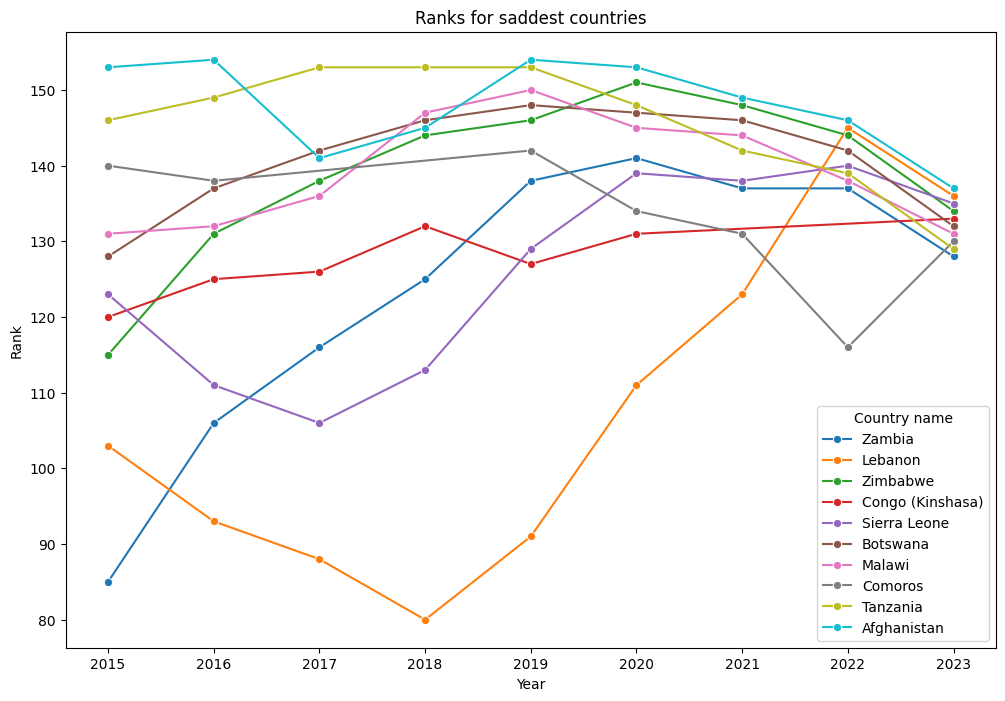

In [32]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Rank", hue="Country name", marker="o")
ax.set(title="Ranks for saddest countries")
plt.show()

In [33]:
diff_report = agg_report.merge(agg_report, how="cross", suffixes=("Start", "End"))
diff_report = diff_report[
    (diff_report["Country nameStart"] == diff_report["Country nameEnd"]) &
    (diff_report["YearStart"] < diff_report["YearEnd"])]
diff_report = diff_report.rename(columns={
    "YearStart": "Start year",
    "YearEnd": "End year",
    "Country nameStart": "Country name",
    "Ladder scoreStart": "Start year ladder score",
    "Ladder scoreEnd": "End year ladder score",
})
diff_report = diff_report[["Start year", "End year", "Country name", 
             "Start year ladder score", "End year ladder score"]]
diff_report["Difference in ladder score"] = diff_report["End year ladder score"] - diff_report["Start year ladder score"]
diff_report.sample(10)

,Start year,End year,Country name,Start year ladder score,End year ladder score,Difference in ladder score
295610,2016,2017,Kenya,4.356,4.5530,0.1970
1079495,2021,2022,Dominican Republic,5.545,5.7370,0.1920
53994,2015,2017,Italy,5.948,5.9640,0.0160
334819,2017,2019,Finland,7.469,7.7690,0.3000
398456,2017,2020,Peru,5.715,5.7968,0.0818
125514,2015,2022,India,4.565,3.7770,-0.7880
1078281,2021,2022,Montenegro,5.581,5.5470,-0.0340
254773,2016,2022,Bosnia and Herzegovina,5.163,5.7680,0.6050
116545,2015,2019,Iran,4.686,4.5480,-0.1380
481750,2017,2022,Chad,3.936,4.2510,0.3150


In [34]:
most_positive_diff = diff_report.sort_values(by="Difference in ladder score", ascending=False).head(15)
most_positive_diff

,Start year,End year,Country name,Start year ladder score,End year ladder score,Difference in ladder score
163016,2015,2020,Benin,3.340,5.2160,1.8760
326496,2016,2020,Benin,3.484,5.2160,1.7320
163164,2015,2021,Benin,3.340,5.0450,1.7050
159493,2015,2021,Ivory Coast,3.655,5.3060,1.6510
656179,2018,2022,Liberia,3.495,5.1220,1.6270
489039,2017,2022,Liberia,3.533,5.1220,1.5890
159631,2015,2022,Ivory Coast,3.655,5.2350,1.5800
159355,2015,2020,Ivory Coast,3.655,5.2333,1.5783
490393,2017,2023,Guinea,3.507,5.0720,1.5650
326644,2016,2021,Benin,3.484,5.0450,1.5610


In [35]:
country_max_indices = diff_report.groupby(by="Country name")["Difference in ladder score"].idxmax()
most_positive_diff = (
    diff_report.loc[country_max_indices]
    .sort_values(by="Difference in ladder score", ascending=False)
    .head(10))
most_positive_diff

,Start year,End year,Country name,Start year ladder score,End year ladder score,Difference in ladder score
163016,2015,2020,Benin,3.340,5.2160,1.8760
159493,2015,2021,Ivory Coast,3.655,5.3060,1.6510
656179,2018,2022,Liberia,3.495,5.1220,1.6270
490393,2017,2023,Guinea,3.507,5.0720,1.5650
91386,2015,2023,Romania,5.124,6.5890,1.4650
146071,2015,2021,Congo (Brazzaville),3.989,5.3420,1.3530
164281,2015,2020,Togo,2.839,4.1872,1.3482
109578,2015,2022,Hungary,4.800,6.0860,1.2860
304939,2016,2023,Bulgaria,4.217,5.4660,1.2490
160738,2015,2021,Burkina Faso,3.587,4.8340,1.2470


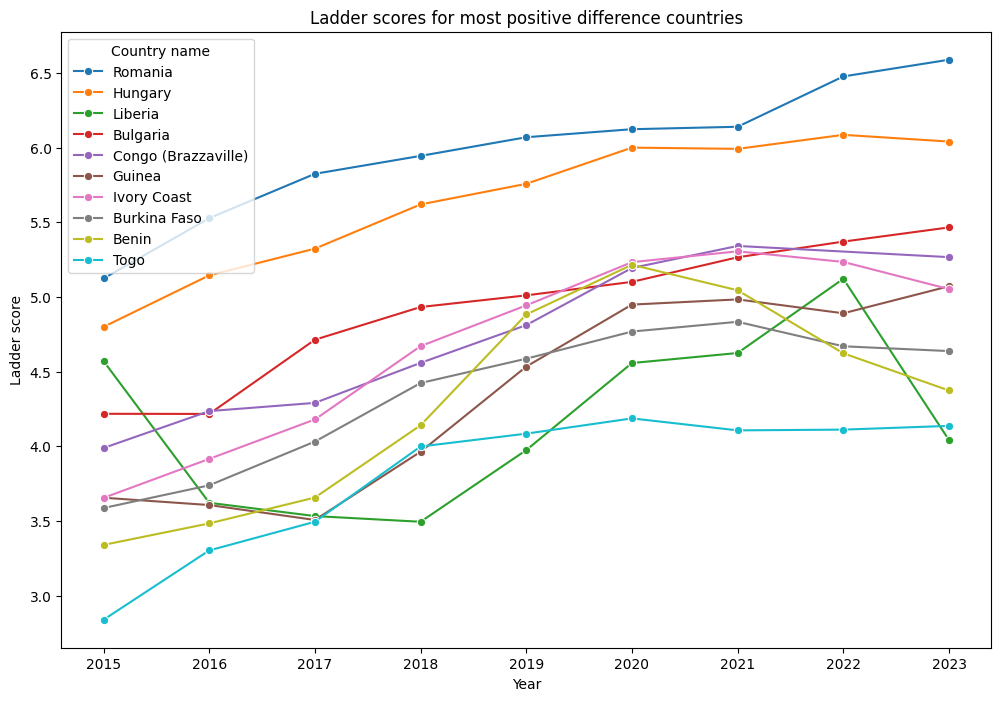

In [36]:
plt.figure(figsize=(12,8))
agg_report_filtered = agg_report[agg_report["Country name"].isin(most_positive_diff["Country name"])]
ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Ladder score", hue="Country name", marker="o")
ax.set(title="Ladder scores for most positive difference countries")
plt.show()

In [37]:
country_min_indices = diff_report.groupby(by="Country name")["Difference in ladder score"].idxmin()
most_negative_diff = (
    diff_report.loc[country_min_indices]
    .sort_values(by="Difference in ladder score", ascending=True)
    .head(10))
most_negative_diff

,Start year,End year,Country name,Start year ladder score,End year ladder score,Difference in ladder score
580718,2018,2023,Lebanon,5.3580,2.3920,-2.9660
26257,2015,2019,Venezuela,6.8100,4.7070,-2.1030
484339,2017,2023,Afghanistan,3.7940,1.8590,-1.9350
123080,2015,2022,Zimbabwe,4.6100,2.9950,-1.6150
445297,2017,2023,Sierra Leone,4.7090,3.1380,-1.5710
208314,2016,2021,Algeria,6.3550,4.8870,-1.4680
89866,2015,2020,Zambia,5.1290,3.7594,-1.3696
126875,2015,2023,Congo (Kinshasa),4.5170,3.2070,-1.3100
409905,2017,2023,Jordan,5.3360,4.1200,-1.2160
902642,2020,2022,Pakistan,5.6933,4.5160,-1.1773


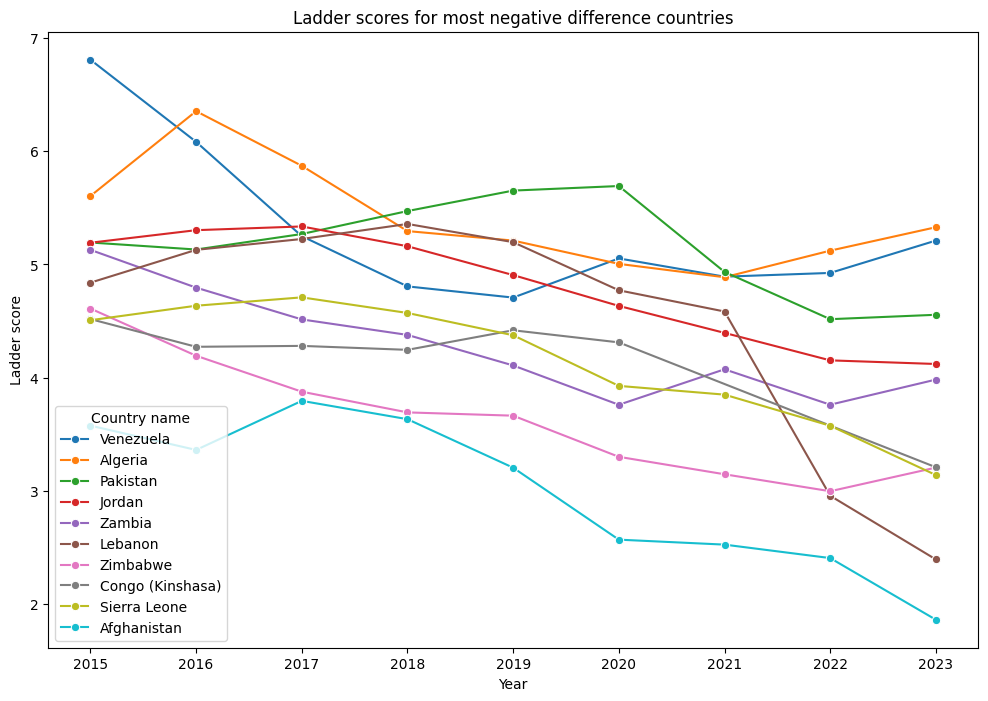

In [38]:
plt.figure(figsize=(12,8))
agg_report_filtered = agg_report[agg_report["Country name"].isin(most_negative_diff["Country name"])]
ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Ladder score", hue="Country name", marker="o")
ax.set(title="Ladder scores for most negative difference countries")
plt.show()

Map of Ladder Scores and Rands per Year

In [39]:
gdf.head()

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,None,None,None,None,None,None,None,None,NIC.geojson,"POLYGON ((-83.15752 14.99307, -83.18535 14.956..."
1,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,None,None,None,None,None,None,None,None,HTI.geojson,"MULTIPOLYGON (((-71.77925 19.71816, -71.75742 ..."
2,Admin-0 country,3,6,France,FR1,1,2,Dependency,1,Saint Martin,...,None,None,None,None,None,None,None,None,MAF.geojson,"POLYGON ((-63.01118 18.06895, -63.12305 18.068..."
3,Admin-0 country,3,6,Netherlands,NL1,1,2,Country,1,Sint Maarten,...,None,None,None,None,None,None,None,None,SXM.geojson,"POLYGON ((-63.12305 18.06895, -63.01118 18.068..."
4,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,None,None,None,None,None,None,None,None,CRI.geojson,"POLYGON ((-82.56357 9.57666, -82.56924 9.55820..."


In [79]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt
from shapely.geometry import Polygon, MultiPolygon
import pandas as pd

# Function to convert MultiPolygon to individual Polygons
def explode_multipolygons(gdf):
    multipolygon_gdf = gdf[gdf.geometry.type == 'MultiPolygon']
    polygon_gdf = gdf[gdf.geometry.type == 'Polygon']
    
    exploded_polygons = []
    for idx, row in multipolygon_gdf.iterrows():
        multi = row.geometry
        if isinstance(multi, MultiPolygon):
            for poly in multi.geoms:  # Use geoms property
                new_row = row.copy()
                new_row.geometry = poly
                exploded_polygons.append(new_row)
        else:
            exploded_polygons.append(row)
    
    exploded_gdf = gpd.GeoDataFrame(exploded_polygons, columns=gdf.columns)
    return pd.concat([polygon_gdf, exploded_gdf], ignore_index=True)

# Load world geometries from GeoPandas datasets
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert MultiPolygons to Polygons
gdf = explode_multipolygons(gdf)




C:\Users\91975\AppData\Local\Temp\ipykernel_12260\4085965198.py:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
c:\Users\91975\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


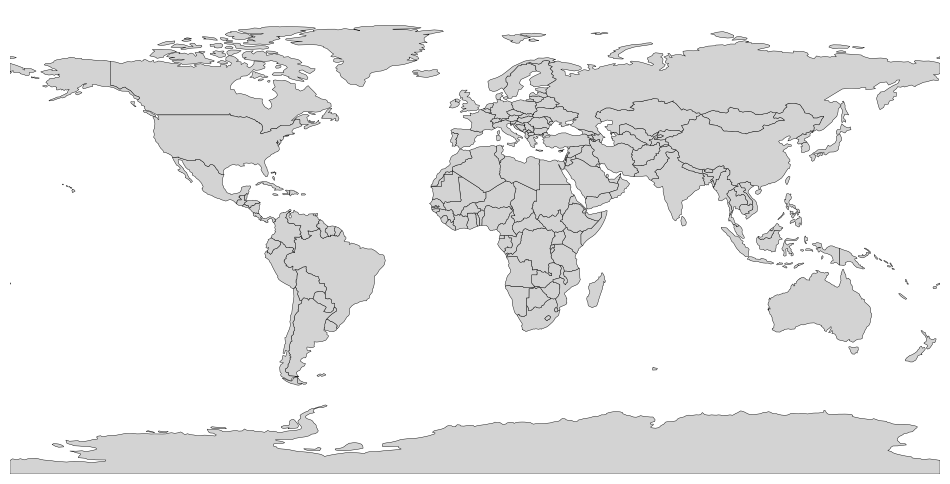

In [63]:
gplt.polyplot(
    gdf, 
    edgecolor='black', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))
plt.show()

In [41]:
# gdf["name"]

diff1 = [x for x in countries if x not in gdf["sovereignt"].unique()]
diff2 = [x for x in gdf["sovereignt"].unique() if x not in countries]
diff1.sort()
diff2.sort()
print(f"Countries in agg report but not in gdf: {diff1}")
print()
print(f"Countries in gdf but not in agg report: {diff2}")

Countries in agg report but not in gdf: ['Congo (Brazzaville)', 'Congo (Kinshasa)', 'Hong Kong S.A.R. of China', 'Mauritius', 'Serbia', 'State of Palestine', 'Taiwan Province of China', 'Tanzania', 'Turkiye', 'United States']

Countries in gdf but not in agg report: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Federated States

In [42]:
def rename_countries(country_dict):
    for old, new in country_dict.items():
        gdf.loc[gdf["sovereignt"] == old, "sovereignt"] = new

rename_countries({
    "United States of America": "United States",
    "Czech Republic": "Czechia",
    "Democratic Republic of the Congo": "Congo (Kinshasa)",
    "Republic of the Congo": "Congo (Brazzaville)",
    "United Republic of Tanzania": "Tanzania"
})

In [43]:
gdf = gdf.rename(columns={"sovereignt": "Country name"})
geo_agg_report = gdf.merge(agg_report, on=["Country name"])
geo_agg_report.sample(10)

,featurecla,scalerank,labelrank,Country name,sov_a3,adm0_dif,level,type,tlc,admin,...,Year,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Explained by: GDP per capita,CatYear
834,Admin-0 country,1,5,Benin,BEN,0,2,Sovereign country,1,Benin,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
157,Admin-0 country,3,6,United Kingdom,GB1,1,2,Dependency,1,Montserrat,...,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1171,Admin-0 country,1,6,Slovakia,SVK,0,2,Sovereign country,1,Slovakia,...,2020,1.972317,1.194838,1.424331,0.853465,0.423543,0.116730,0.011291,NaN,2020
416,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,1,Uzbekistan,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
1018,Admin-0 country,5,2,Russia,RUS,0,2,Sovereign country,1,Russia,...,2020,1.972317,1.127000,1.378644,0.680446,0.399500,0.099042,0.045699,NaN,2020
513,Admin-0 country,1,3,Iraq,IRQ,0,2,Sovereign country,1,Iraq,...,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
1153,Admin-0 country,1,3,Romania,ROU,0,2,Sovereign country,1,Romania,...,2020,1.972317,1.120402,1.194438,0.792295,0.534852,0.068182,0.000830,NaN,2020
925,Admin-0 country,1,3,Burkina Faso,BFA,0,2,Sovereign country,1,Burkina Faso,...,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
49,Admin-0 country,1,3,Guatemala,GTM,0,2,Sovereign country,1,Guatemala,...,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1411,Admin-0 country,3,4,France,FR1,1,2,Dependency,1,French Polynesia,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [69]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs

# Load world geometries from GeoPandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Sample geo_agg_report DataFrame with some missing countries
data = {
    'Country': ['China', 'India', 'United States', 'Brazil', 'Australia', 'Nonexistent Country'],
    'Year': [2023, 2023, 2023, 2023, 2023, 2023],
    'Ladder score': [5.6, 4.3, 7.1, 6.2, 7.5, 3.4]
}
geo_agg_report = pd.DataFrame(data)

# Merge the world GeoDataFrame with geo_agg_report on country name
geo_agg_report = world.merge(geo_agg_report, how='left', left_on='name', right_on='Country')



C:\Users\91975\AppData\Local\Temp\ipykernel_12260\3855074907.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


c:\Users\91975\AppData\Local\Programs\Python\Python310\lib\site-packages\geoplot\geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

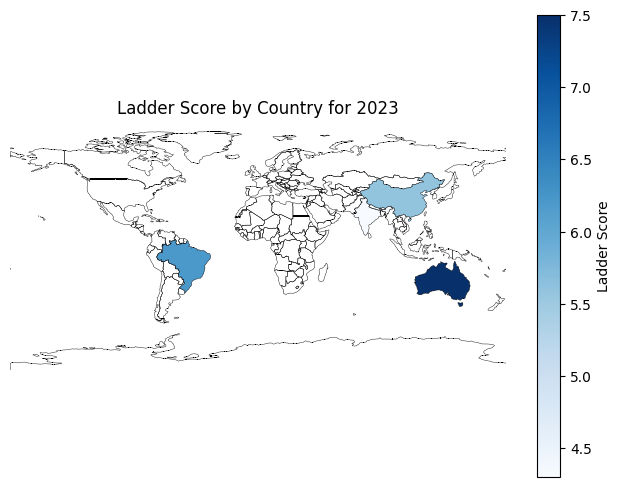

In [68]:
# Plotting
plt.figure(figsize=(12, 8))
gplt.choropleth(
    geo_agg_report,
    hue="Ladder score",
    edgecolor='black',
    cmap='Blues',
    legend=True,
    linewidth=.3,
    projection=gcrs.PlateCarree(),  # Specify the coordinate reference system
    legend_kwargs={'label': "Ladder Score"}  # Add legend label
)
plt.title("Ladder Score by Country for 2023")
plt.show()


Social Support

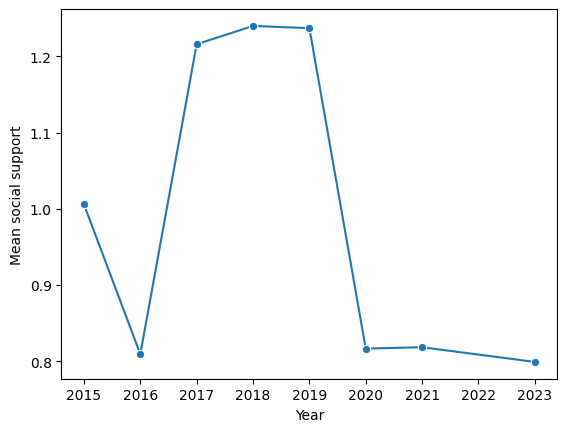

In [46]:
agg_report_grped = agg_report.groupby(by="Year").mean(numeric_only=True)
ax = sns.lineplot(data=agg_report_grped, x="Year", y="Social support", marker="o")
ax.set_ylabel("Mean social support")
plt.show()

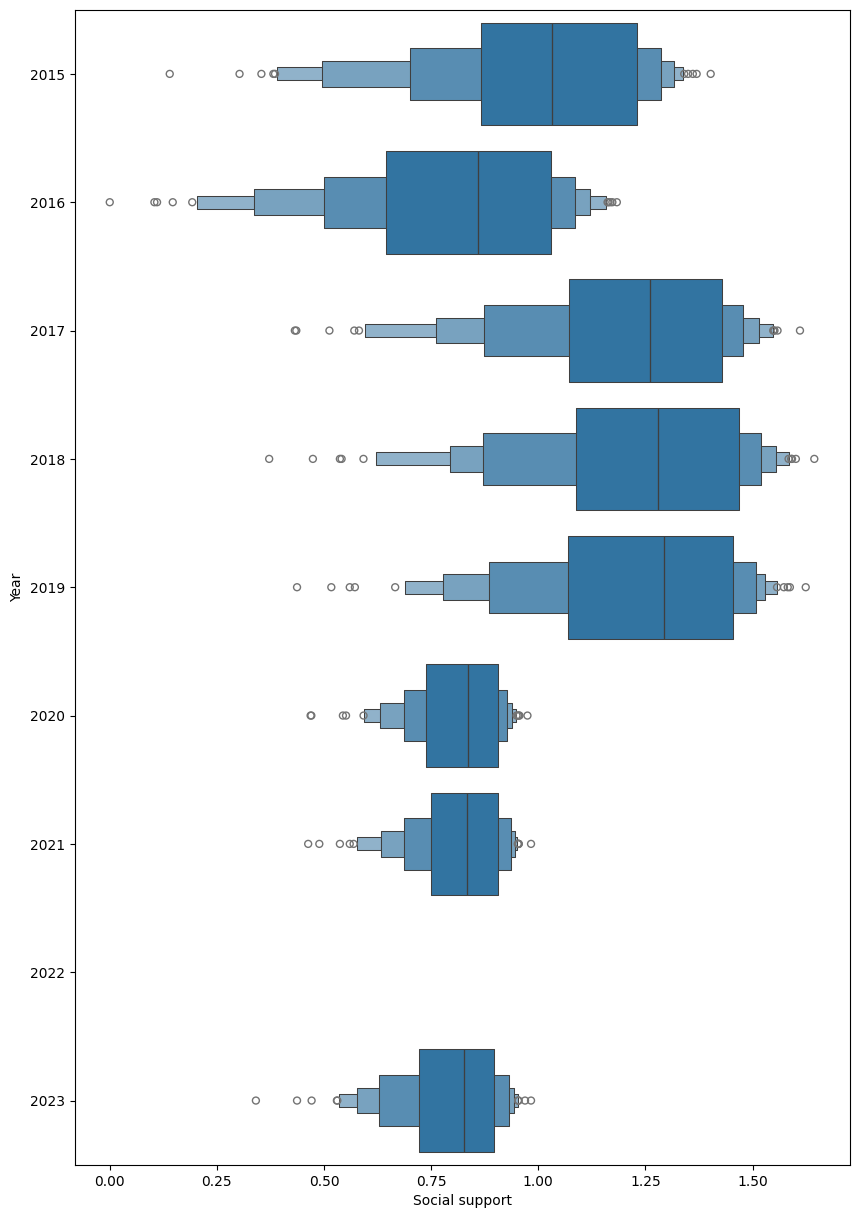

In [47]:
plt.figure(figsize=(10,15))
ax = sns.boxenplot(data=agg_report, x="Social support", y="CatYear")
ax.set_ylabel("Year")
plt.show()

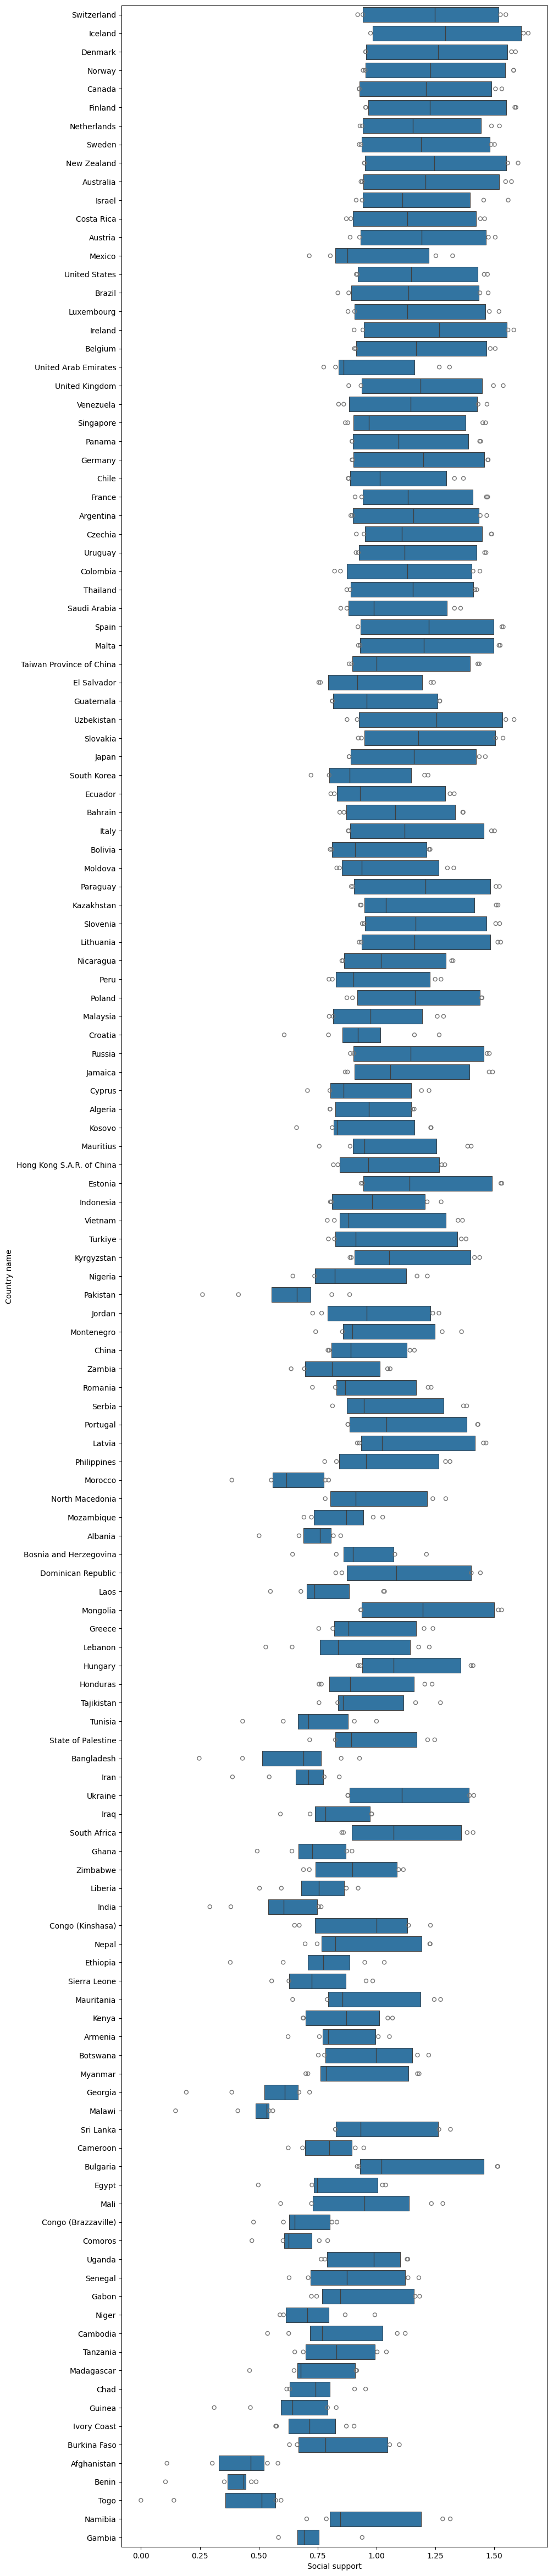

In [48]:
plt.figure(figsize=(10,60))
ax = sns.boxenplot(data=agg_report, x="Social support", y="Country name")
plt.show()

Social Support for Selected Countries

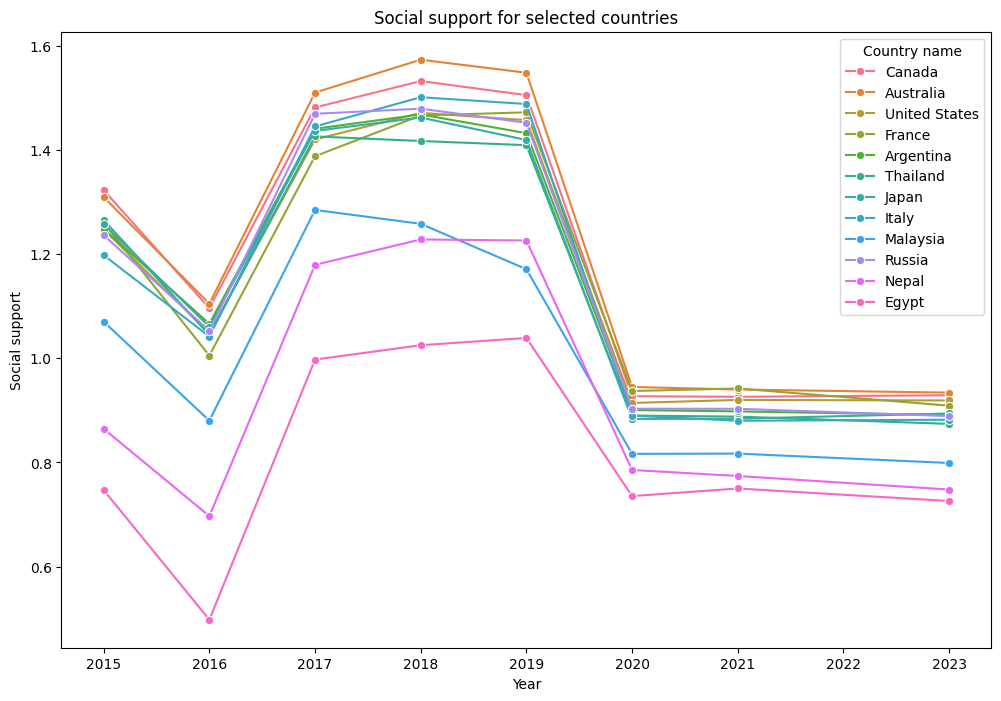

In [49]:
plt.figure(figsize=(12,8))
countries_of_interest = ["Japan", "Malaysia", "Nepal", "Thailand", "Australia", "United States", "Canada", "Egypt", "Argentina", "France", "Russia", "Italy"]
agg_report_filtered = agg_report[agg_report["Country name"].isin(countries_of_interest)]

ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Social support", hue="Country name", marker="o")
ax.set(title="Social support for selected countries")
plt.show()

Countries with Higest Social Support

In [50]:
highest_social_support_countries = agg_report[agg_report["Year"] == 2023].sort_values(by="Social support", ascending=False).head(10)
highest_social_support_countries[["Country name", "Social support", "Ladder score"]]

,Country name,Social support,Ladder score
1085,Iceland,0.983,7.530
1083,Finland,0.969,7.804
1084,Denmark,0.954,7.586
1111,Slovakia,0.953,6.469
1100,Czechia,0.953,6.845
1092,New Zealand,0.952,7.123
1104,Slovenia,0.951,6.650
1113,Estonia,0.946,6.455
1133,Hungary,0.943,6.041
1089,Norway,0.943,7.315


Countries with Lowest Social Support

In [51]:
lowest_social_support_countries = agg_report[agg_report["Year"] == 2023].sort_values(by="Social support", ascending=True).head(10)
lowest_social_support_countries[["Country name", "Social support", "Ladder score"]]

,Country name,Social support,Ladder score
1219,Afghanistan,0.341,1.859
1198,Benin,0.437,4.374
1212,Comoros,0.471,3.545
1218,Lebanon,0.530,2.392
1213,Malawi,0.531,3.495
1200,Bangladesh,0.544,4.282
1182,Morocco,0.553,4.903
1217,Sierra Leone,0.555,3.138
1175,Ivory Coast,0.572,5.053
1201,Gambia,0.584,4.279


Correlation Matrix

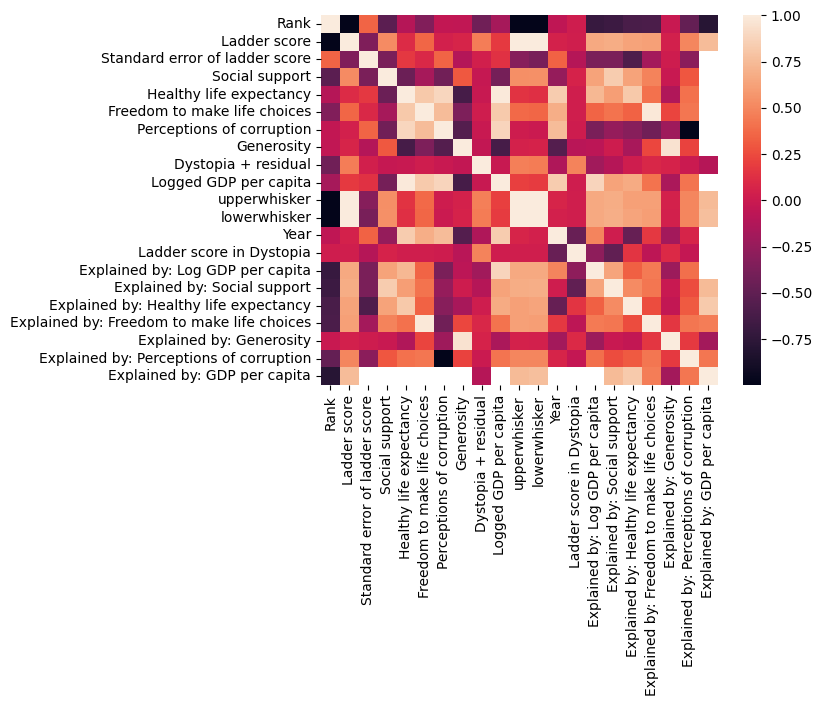

In [52]:
sns.heatmap(agg_report.corr(numeric_only=True))
plt.show()